#### IMPORTACIÓN DEL DATASET

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargo el archivo CSV
df  = pd.read_csv(r'C:\Users\sfaija\Challenge_Data_Science\full_devices.csv', encoding="ISO-8859-1")

# Muestro los primeros registros para tener una idea de la estructura del archivo
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


date: Fecha de la medición.

device: Identificación del dispositivo.

failure: Variable objetivo que indica si el dispositivo ha fallado (1) o no (0).

attribute1 a attribute9: Atributos de telemetría de los dispositivos.

## Análisis Descriptivo
A continuación, voy a hacer un análisis exploratorio básico para entender mejor la distribución y estadísticas descriptivas de las columnas, especialmente la variable objetivo failure.

En primer lugar analizaré si cuento con valores nullos

In [80]:
# Verifico valores faltantes en el conjunto de datos
missing_values = df.isnull().sum()

missing_values

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

No hay valores faltantes en el conjunto de datos, lo cual es excelente.

In [81]:
# Estadísticas descriptivas del conjunto de datos
desc_stats = df.describe()

# Distribución de la variable objetivo 'failure'
failure_distribution = df['failure'].value_counts(normalize=True)

desc_stats, failure_distribution


(             failure    attribute1     attribute2     attribute3  \
 count  124494.000000  1.244940e+05  124494.000000  124494.000000   
 mean        0.000851  1.223881e+08     159.484762       9.940455   
 std         0.029167  7.045933e+07    2179.657730     185.747321   
 min         0.000000  0.000000e+00       0.000000       0.000000   
 25%         0.000000  6.128476e+07       0.000000       0.000000   
 50%         0.000000  1.227974e+08       0.000000       0.000000   
 75%         0.000000  1.833096e+08       0.000000       0.000000   
 max         1.000000  2.441405e+08   64968.000000   24929.000000   
 
           attribute4     attribute5     attribute6     attribute7  \
 count  124494.000000  124494.000000  124494.000000  124494.000000   
 mean        1.741120      14.222669  260172.657726       0.292528   
 std        22.908507      15.943028   99151.078547       7.436924   
 min         0.000000       1.000000       8.000000       0.000000   
 25%         0.000000      

Basándonos en el análisis exploratorio:

failure: Esta es nuestra variable objetivo. La media cercana a 0 indica que la mayoría de los registros no tienen fallas, lo cual es esperado en este tipo de conjuntos de datos.

attribute1: Tiene valores que varían ampliamente, desde 0 hasta aproximadamente 244 millones.

attribute2: Aunque el 75% de los datos son 0, el valor máximo es 64,968, lo que sugiere que hay algunos valores atípicos.

attribute3: Al igual que attribute2, la mayoría de los datos son 0, pero tiene un valor máximo de 24,929.

attribute4: Tiene un valor máximo de 1,666, pero el 75% de los datos son 0.

attribute5: Los valores varían desde 1 hasta 98.

attribute6: Varía desde 8 hasta aproximadamente 689 mil.

attribute7 y attribute8: Estas dos columnas parecen tener estadísticas idénticas, lo que sugiere que podrían ser duplicadas. 

Ambas tienen un valor máximo de 832 y el 75% de los datos son 0.

attribute9: La mayoría de los datos son 0, pero tiene un valor máximo de 18,701.

Es importante señalar que varias de estas características tienen una gran cantidad de ceros. Estos ceros podrían ser 
indicativos de la ausencia de ciertas mediciones o características, o podrían ser valores válidos en sí mismos.


Examino la distribución de la variable objetivo "failure" para entender el desbalance entre las clases.

In [82]:
# Distribución de la variable objetivo "failure"
failure_distribution = df['failure'].value_counts(normalize=True)

failure_distribution

0    0.999149
1    0.000851
Name: failure, dtype: float64

La distribución de la variable objetivo "failure" es:

No falla (99.91%)
Falla (0.0851%)

Esto indica que el conjunto de datos está altamente desbalanceado, con la gran mayoría de registros perteneciendo a la clase "No falla". Este desbalance es común en conjuntos de datos relacionados con fallas o eventos raros, pero es importante tenerlo en cuenta al construir y evaluar modelos predictivos, ya que podría afectar el rendimiento del modelo.

## Ingeniería de características

Verificaré si los casos de "attribute7" y "attribute8" son duplicados

In [83]:
# Sospecho que "attribute7" y "attribute8" son duplicados (lo detecté cuando analicé estadistica descriptiva )
are_attributes_duplicated = (df["attribute7"] == df["attribute8"]).all()

are_attributes_duplicated

True

Como se confirmó, "attribute7" y "attribute8" son duplicados. Por lo tanto, podemos eliminar uno de ellos para evitar redundancia.

## Análisis de distribuciones:
A continuación voy a analizar la distribución de cada atributo mediante histogramas. Esto es útil para comprender la distribución de cada característica y detectar posibles problemas, como sesgos o valores atípicos.

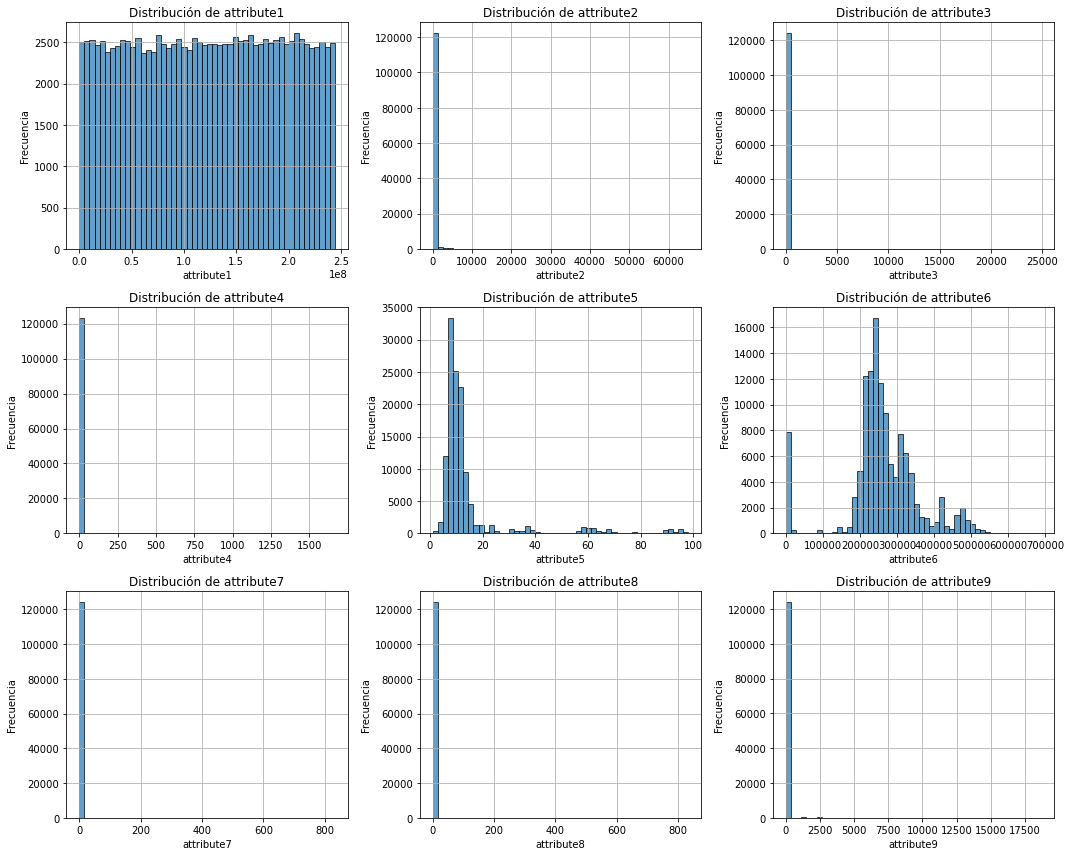

In [62]:
import matplotlib.pyplot as plt

# Configuro el tamaño de las gráficas
plt.figure(figsize=(15, 12))

# Creo histogramas para cada atributo
for i, column in enumerate(df.columns[3:12], 1):
    plt.subplot(3, 3, i)
    df[column].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

attribute1: Esta característica parece tener una distribución bastante uniforme a lo largo de su rango.

attribute2, attribute3, attribute4, attribute7, attribute8, y attribute9: Estas características están altamente sesgadas hacia el valor 0, lo que indica que la mayoría de los dispositivos tienen un valor de 0 para estos atributos en la mayoría de los días.

attribute5 y attribute6: Estas características tienen una distribución un poco más distribuida en comparación con otras, pero aún muestran un cierto grado de sesgo.

Las distribuciones de estos atributos indican que muchos de ellos están altamente sesgados, con la mayoría de los valores concentrados en 0 o cerca de 0. 

### GRAFICOS DE DENSIDAD

Voy a analizar gráficos de densidad para cada atributo, separados por la variable objetivo "failure". Esto es fundamental para identificar qué características pueden influir en la probabilidad de falla.

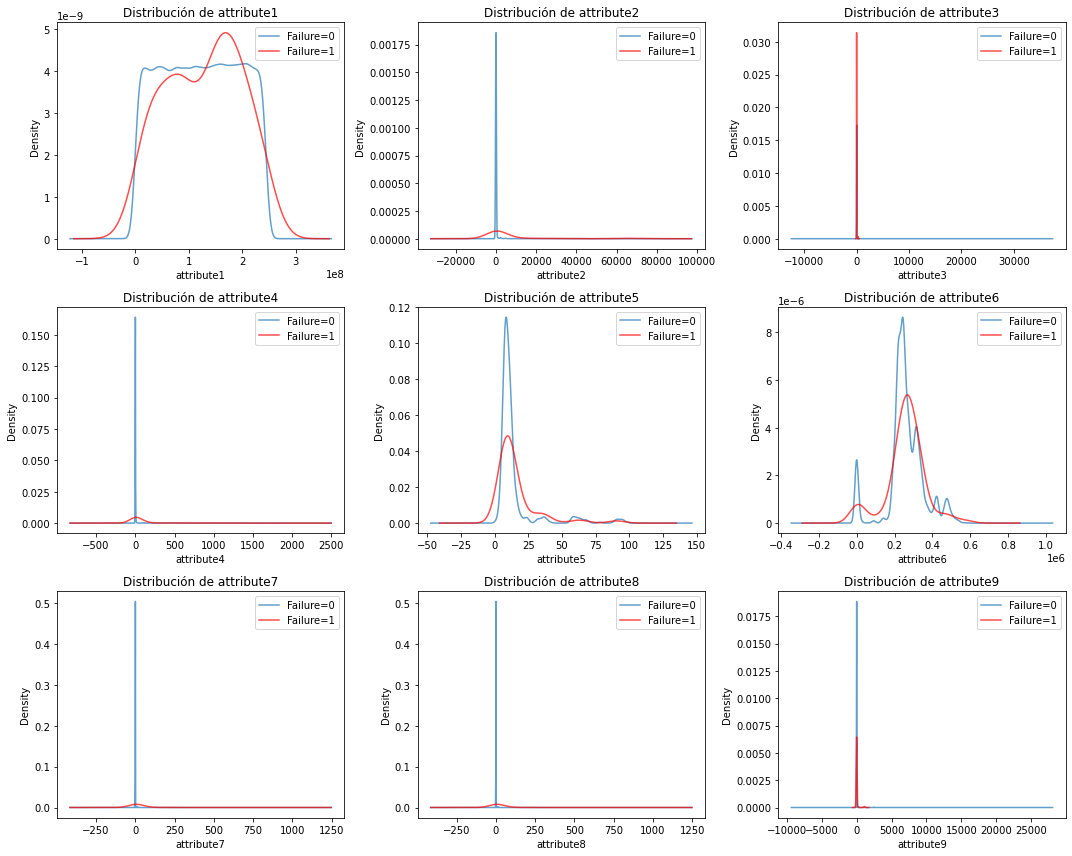

In [63]:
# Configuro el tamaño de las gráficas
plt.figure(figsize=(15, 12))

# Creo gráficos de densidad para cada atributo, separado por la variable objetivo "failure"
for i, column in enumerate(df.columns[3:12], 1):
    plt.subplot(3, 3, i)
    
    # Gráfico de densidad para failure = 0
    df[df['failure'] == 0][column].plot(kind='density', label='Failure=0', alpha=0.7)
    
    # Gráfico de densidad para failure = 1
    df[df['failure'] == 1][column].plot(kind='density', label='Failure=1', color='red', alpha=0.7)
    
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


attribute1: Ambas clases (falla y no falla) tienen distribuciones similares para este atributo, lo que sugiere que "attribute1" por sí solo podría no ser un buen indicador de falla.

attribute2: Mientras que la mayoría de los dispositivos tienen un valor cercano a 0 para este atributo, se observa un pico en la densidad para los dispositivos que fallaron cuando "attribute2" tiene valores distintos de cero. Esto indica que valores más altos de "attribute2" podrían estar asociados con fallas.

attribute3: Aunque ambos grupos tienen un pico en el valor 0, los dispositivos que fallaron muestran una distribución más dispersa en comparación con aquellos que no fallaron.

attribute4: Al igual que "attribute2", hay un aumento en la densidad para los dispositivos que fallaron en valores distintos de cero, lo que sugiere que este atributo podría ser un buen indicador de falla.

attribute5: Las distribuciones son bastante similares para ambos grupos, aunque hay una ligera variación en la densidad en valores más altos.

attribute6: Las distribuciones son similares entre dispositivos que fallaron y los que no, aunque los que fallaron parecen tener una densidad ligeramente mayor en valores más bajos.

attribute7 y attribute8: Estos atributos, que son idénticos entre sí, muestran un claro pico en la densidad para los dispositivos que fallaron en valores más altos. Esto sugiere que estos atributos son indicadores fuertes de falla.

attribute9: Aunque la mayoría de los dispositivos tienen un valor cercano a 0 para este atributo, hay una ligera variación en la densidad para valores más altos entre dispositivos que fallaron y los que no.

En resumen:

Los atributos "attribute2", "attribute4", "attribute7" y "attribute8" parecen ser indicadores fuertes de falla, ya que muestran claras diferencias en la densidad entre dispositivos que fallaron y los que no.
Otros atributos, como "attribute3" y "attribute6", muestran diferencias más sutiles en su distribución entre los dos grupos.
Algunos atributos, como "attribute1" y "attribute5", no muestran diferencias significativas en su distribución entre dispositivos que fallaron y los que no, lo que sugiere que podrían no ser tan informativos para predecir fallas por sí solos.

### MATRIZ DE CORRELACIÓN:
Matriz de correlación entre las características y la variable objetivo para identificar posibles relaciones lineales.

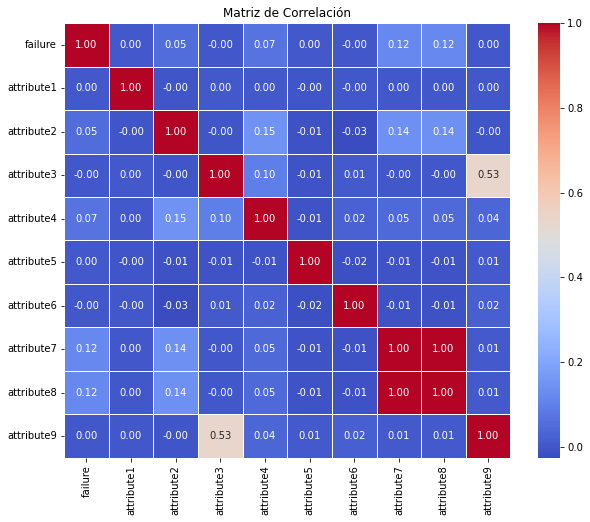

In [64]:
import seaborn as sns

# Calculo la matriz de correlación
correlation_matrix = df.iloc[:, 2:].corr()

# Configuro el tamaño de la gráfica
plt.figure(figsize=(10, 8))

# Creo un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Configuro el título y mostrar la gráfica
plt.title('Matriz de Correlación')
plt.show()


attribute7 y attribute8: Como se observó anteriormente, estos dos atributos son idénticos, lo que se refleja en su correlación perfectamente positiva de 1.0.

failure y attribute2, attribute4, attribute7, attribute8: Hay correlaciones positivas entre la variable objetivo "failure" y estos atributos, aunque no son extremadamente altas. Esto coincide con nuestras observaciones anteriores de los gráficos de densidad, donde notamos que estos atributos tenían distribuciones distintas para dispositivos que fallaron en comparación con los que no.

Los demás atributos no muestran correlaciones fuertes entre sí o con la variable objetivo.

La matriz de correlación nos brinda información sobre cómo las características se relacionan entre sí y con la variable objetivo. Sin embargo, es importante recordar que la correlación no implica causalidad, y una correlación baja no necesariamente significa que una característica no es útil para la predicción.

## Modelo Predictivo

In [84]:
# Distribución de la variable objetivo "failure"
failure_distribution_df = df['failure'].value_counts(normalize=True)

failure_distribution_df


0    0.999149
1    0.000851
Name: failure, dtype: float64

El conjunto de datos está altamente desbalanceado.
Opciones para manejar el desbalance:

Submuestreo (Undersampling): Consiste en reducir aleatoriamente el número de ejemplos en la clase mayoritaria para igualar el número de ejemplos en la clase minoritaria.

Ventajas: Reduce el tamaño del conjunto de datos, lo que puede acelerar el entrenamiento.
Desventajas: Puede descartar información potencialmente útil, lo que puede afectar el rendimiento del modelo.

Sobremuestreo (Oversampling): Consiste en aumentar el número de ejemplos en la clase minoritaria, ya sea replicando ejemplos existentes o generando ejemplos sintéticos (por ejemplo, usando técnicas como SMOTE).

Ventajas: Retiene toda la información del conjunto de datos original y puede mejorar el rendimiento en la clase minoritaria.

Desventajas: Aumenta el tamaño del conjunto de datos, lo que puede ralentizar el entrenamiento. También puede introducir ruido si se generan ejemplos sintéticos.

Dado el alto grado de desbalance, el submuestreo podría resultar en una pérdida significativa de datos, mientras que el sobremuestreo podría ayudar a mejorar el rendimiento en la clase minoritaria sin perder información.

Avanzo con tecnicas de sobremuestreo: procederé con el sobremuestreo utilizando la técnica SMOTE (Synthetic Minority Over-sampling Technique). SMOTE crea ejemplos sintéticos para la clase minoritaria basándose en los vecinos más cercanos de cada punto.

In [85]:

from imblearn.over_sampling import SMOTE

# Separo el conjunto de datos en características y etiquetas
X = df.drop(columns=['date', 'device', 'failure'])
y = df['failure']

#  SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Aplio SMOTE al conjunto de datos
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifico la distribución de las clases después del sobremuestreo
resampled_distribution = y_resampled.value_counts(normalize=True)

resampled_distribution


0    0.5
1    0.5
Name: failure, dtype: float64

Después de aplicar el sobremuestreo con SMOTE, he logrado un equilibrio perfecto entre las clases. Ahora, tanto feature=0 y
failure=1 representan el 50% del conjunto de datos.

##### División del conjunto de datos


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Estandarizo las características para que tengan una media de 0 y una desviación estándar de 1. Esto es especialmente importante para modelos que son sensibles a la escala de las características, como la regresión logística o SVM.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Como punto de partida, utilizo un modelo de regresión logística, que es un modelo lineal adecuado para tareas de clasificación binaria.
Previo voy a analizar la importancia de las varianbles a traves de un random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Inicio un modelo de bosque aleatorio
rf_model = RandomForestClassifier(random_state=42)

# Entreno el modelo usando el conjunto de entrenamiento
rf_model.fit(X_train_scaled, y_train)

# Obtengo la importancia de las características
feature_importances = rf_model.feature_importances_

# Creo un DataFrame para visualizar las importancias
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df


,Feature,Importance
3,attribute4,0.268264
1,attribute2,0.257551
7,attribute8,0.127551
6,attribute7,0.110406
0,attribute1,0.095214
5,attribute6,0.070336
4,attribute5,0.044168
8,attribute9,0.016549
2,attribute3,0.009961


attribute4 y attribute2 son claramente las características más importantes, seguidas de attribute8, attribute7, y attribute1.
Las características attribute6, attribute5, attribute9, y attribute3 tienen importancias más bajas.

Voy a evaluar el modelo de regresion logistica, en primer lugar evaluando con todas las features

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [90]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones
y_pred = model.predict(X_test_scaled)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.76      0.97      0.85     24752
           1       0.96      0.69      0.80     25004

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.83     49756
weighted avg       0.86      0.83      0.83     49756

ROC-AUC Score: 0.8297234885857177


In [91]:
# Selecciono solo las características más importantes
selected_features = ['attribute4', 'attribute2', 'attribute8', 'attribute7']

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Identifico los índices de las características seleccionadas
selected_indices = [X.columns.get_loc(col) for col in selected_features]

# Selecciono solo las características más importantes del conjunto escalado
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

# Inicio y entreno el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_selected, y_train)

# Predicciones y evaluación
y_pred = logistic_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")



              precision    recall  f1-score   support

           0       0.75      0.97      0.85     24752
           1       0.96      0.69      0.80     25004

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.82     49756
weighted avg       0.86      0.83      0.82     49756

ROC-AUC Score: 0.8286226466208845


In [75]:
selected_indices

[3, 1, 7, 6]

Las features mas importantes que usamos en esta iteración fueron las mas importantes:
attribute4
attribute2
attribute8
attribute7

El modelo no presentó un cambio significativo cuando utilizamos las variables con mayor relevancia

Voy a enumerar algunos algoritmos comunes que puedo considerar, y luego le proporcionaré el código para entrenar y evaluar cada uno de ellos en el conjunto de datos:

Regresión Logística: Ya lo mencioné anteriormente.

Árbol de Decisión: Un modelo simple basado en árboles que divide el espacio de características en regiones.

Bosque Aleatorio: Un ensamblado de árboles de decisión que promedia los resultados para mejorar la precisión y controlar el sobreajuste.

Gradient Boosting: Otro ensamblado que construye árboles de forma secuencial, corrigiendo errores de árboles anteriores.

Máquinas de Soporte Vectorial (SVM): Un algoritmo que busca el hiperplano que mejor divide las clases en el espacio de características.

### Mas adelante haré validacion cruzada

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Defino modelos a evaluar
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
   ## 'SVM': SVC(random_state=42, probability=True)  # probability=True para poder calcular ROC-AUC 
}

# Entreno y evaluo cada modelo
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_selected, y_train)
    
    # Realizo predicciones
    y_pred = model.predict(X_test_selected)
    
    # Muestro resultados
    print(f"Model: {name}")
    print("--------------------------")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC Score: {roc_auc}")
    print("\n\n")


Model: Logistic Regression
--------------------------
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     24752
           1       0.96      0.69      0.80     25004

    accuracy                           0.83     49756
   macro avg       0.86      0.83      0.82     49756
weighted avg       0.86      0.83      0.82     49756

ROC-AUC Score: 0.8286226466208845



Model: Decision Tree
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24752
           1       0.97      0.93      0.95     25004

    accuracy                           0.95     49756
   macro avg       0.95      0.95      0.95     49756
weighted avg       0.95      0.95      0.95     49756

ROC-AUC Score: 0.9515937630974519



Model: Random Forest
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24752
           1 

Los modelos dieron muy bien. A pesar de eso  voy a realizar la tecnica de validacion cruzada para asegurarse de que el rendimiento observado no sea el resultado del sobreajuste.

### VALIDACIÓN CRUZADA
Voy implementar la técnica de validación cruzada ya que permite evaluar el rendimiento del modelo en diferentes subconjuntos del dataset, reduciendo la variabilidad y proporcionando una estimación más robusta del rendimiento del modelo.

Voy a utilizar la validación cruzada k-fold, que divide el conjunto de datos en k subconjuntos (o "folds"). 

In [95]:
from sklearn.model_selection import cross_validate

# Número de "folds" para la validación cruzada
k_folds = 5

# Métricas de evaluación
scoring_metrics = ['roc_auc', 'f1', 'precision', 'recall']

# Diccionario para almacenar los resultados de cada modelo
cv_results = {}

# Realizo validación cruzada para cada modelo
for name, model in models.items():
    scores = cross_validate(model, X_resampled[selected_features], y_resampled, cv=k_folds, scoring=scoring_metrics)
    
    # Almaceno los resultados en el diccionario
    cv_results[name] = scores

# Muestro los resultados
for model, scores in cv_results.items():
    print(f"{model}:")
    for metric in scoring_metrics:
        metric_scores = scores[f"test_{metric}"]
        print(f"{metric.upper()} scores: {metric_scores}")
        print(f"Average {metric.upper()}: {metric_scores.mean():.4f}")
        print(f"Standard Deviation: {metric_scores.std():.4f}")
        print("--------------------------")


Logistic Regression:
ROC_AUC scores: [0.9428693  0.94858475 0.95075524 0.95248347 0.94342154]
Average ROC_AUC: 0.9476
Standard Deviation: 0.0039
--------------------------
F1 scores: [0.79812579 0.79342046 0.80176439 0.80571334 0.79967506]
Average F1: 0.7997
Standard Deviation: 0.0041
--------------------------
PRECISION scores: [0.95       0.96272081 0.96291704 0.97395863 0.94617455]
Average PRECISION: 0.9592
Standard Deviation: 0.0100
--------------------------
RECALL scores: [0.68811802 0.67475982 0.68681915 0.68703272 0.6924592 ]
Average RECALL: 0.6858
Standard Deviation: 0.0059
--------------------------
Decision Tree:
ROC_AUC scores: [0.95068766 0.96276147 0.96195749 0.9625147  0.95478155]
Average ROC_AUC: 0.9585
Standard Deviation: 0.0049
--------------------------
F1 scores: [0.93453633 0.94717205 0.94684806 0.94805914 0.93850398]
Average F1: 0.9430
Standard Deviation: 0.0055
--------------------------
PRECISION scores: [0.94070213 0.96644913 0.96257839 0.96768387 0.94718742]
A

No se verifican desvios significativos al momento de evaluar la validacion cruzada (Standard Deviation es bajo)

## CONCLUSION:

Los modelos de Decision Tree y Random forest son los que mejor efectividad presentan al momento de realizar validacion cruzada y analizar las principales metricas de F1 y ROC_AUC  :

Decision Tree:
ROC_AUC scores: [0.95068766 0.96276147 0.96195749 0.9625147  0.95478155]
F1 scores: [0.93453633 0.94717205 0.94684806 0.94805914 0.93850398]

Random Forest:
ROC_AUC scores: [0.95402627 0.96527577 0.96554083 0.9657769  0.95785531]
F1 scores: [0.93465082 0.94744603 0.94664491 0.94821549 0.93847868]

A continuación voy a realizar la matriz de confusión para analizar con casos correctamente asignados como los que no.

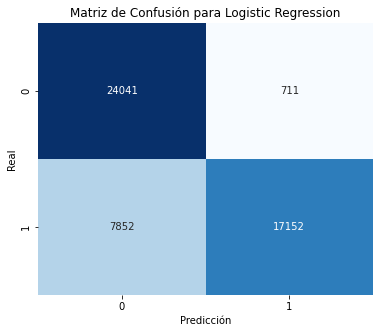

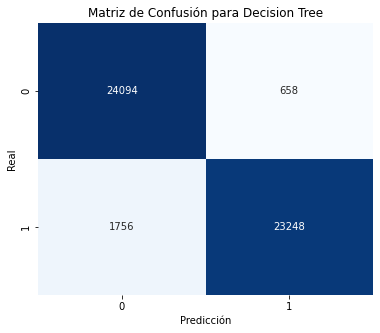

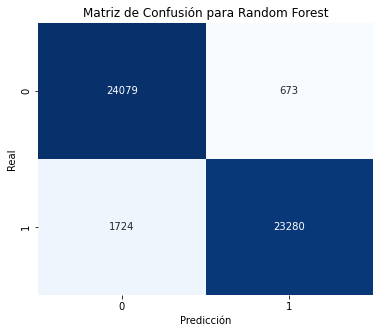

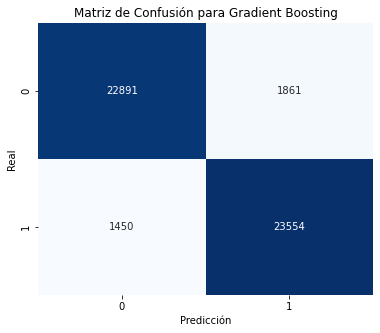

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

# Usando los modelos ya entrenados, generamos y visualizamos las matrices de confusión para cada uno
for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    plot_confusion_matrix(y_test, y_pred, f'Matriz de Confusión para {name}')


Basándonos en estos resultados, tanto el bosque aleatorio como el Gradient Boosting parecen ser los candidatos más prometedores para resolver este problema.

## PREDICCIÓN

Ahora que ya tengo modelos entrenados y he evaluado su rendimiento, el siguiente paso es usar esos modelos para tomar decisiones que minimicen el costo total, basándose en las probabilidades predichas de falla.

Dado que el costo de una falla es 1 y el costo del mantenimiento es 0,5, el mantenimiento preventivo se justificaría si la probabilidad de falla es superior al 50% o hasta incluso mejor >70%. Sin embargo, este es un cálculo simplificado, ya que se podría considerar otros factores (como el costo operativo o las implicaciones logísticas).

## Evaluación de Costos: 

Un buen ejercicio sería estimar el costo total basado en las probabilidades. Por ejemplo, suma el costo de los mantenimientos preventivos y compararlo con el costo que habría incurrido si hubieras permitido que los dispositivos fallaran. (Un buen ejercicio sería evaluar de periodos anteriores cuánto se habría ahorrado si los casos de feature=1 los hubieramos predicho meses anteriores)

## Reentrenamiento del Modelo: 
La tendencia y los comportamientos pueden cambiar. Es muy importante reentrenar el modelo y brindarle los datos mas actualizados posibles.

Feedback Loop: Una vez que se tomen decisiones basadas en las predicciones del modelo y se observen los resultados reales, es importante utilizar esta información para mejorar el modelo. Por ejemplo, si el modelo predice que un dispositivo no fallará y falla, esa es una información valiosa para mejorar el modelo en el futuro.